In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# take some random values as x
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

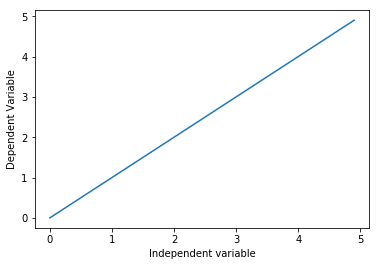

In [4]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1 # weight
b = 0 # bias

Y = a * X + b

plt.plot(X,Y)
plt.xlabel('Independent variable')
plt.ylabel('Dependent Variable')
plt.show()

In [6]:
pwd

'C:\\Users\\madhu'

In [7]:
df = pd.read_csv("MY2012-2018 Plug-in Hybrid Electric Vehicles.csv")

# take a look at the dataset
df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,MOTOR(kW),ENGINESIZE(L),CYLINDERS,TRANSMISSION,FUEL 1,CONSUMPTION,RANGE 1,RECHARGE,FUEL2,CONSUMPTION CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),RANGE 2,CO2 EMISSIONS,CO2,SMOG
0,2012,CHEVROLET,VOLT,COMPACT,111,1.4,4,AV,B,2.5 (22.3 kWh/100 km),56,4.0,Z,6.7,5.9,6.4,550,54,NaN,NaN
1,2013,CHEVROLET,VOLT,COMPACT,111,1.4,4,AV,B,2.4 (21.4 kWh/100 km),61,4.0,Z,6.7,5.9,6.4,550,45,NaN,NaN
2,2013,FORD,C-MAX ENERGI,MID-SIZE,68,2.0,4,AV,B/X,2.7 ([23.2 kWh + 0.1 L]/100 km),32,2.5,X,5.8,6.5,6.1,856,80,NaN,NaN
3,2013,FORD,FUSION ENERGI,MID-SIZE,68,2.0,4,AV,B/X,2.7 ([23.2 kWh + 0.1 L]/100 km),32,2.5,X,5.8,6.5,6.1,856,80,NaN,NaN
4,2013,TOYOTA,PRIUS PLUG-IN,MID-SIZE,60,1.8,4,AV,B/X,2.5 ([18.0 kWh + 0.4 L]/100 km),18,1.5,X,4.7,4.8,4.7,845,101,NaN,NaN


In [8]:
train_x = np.asanyarray(df[['ENGINESIZE(L)']])
train_y = np.asanyarray(df[['CO2 EMISSIONS']])

In [9]:
a = tf.Variable(10.0)
b = tf.Variable(15.0)
 
#op = tf.global_variables_initializer()
y = a * train_x + b
y
# with tf.Session() as sess:
#     result = sess.run(y)
#     print(result)

<tf.Tensor 'add:0' shape=(80, 1) dtype=float32>

In [10]:
loss = tf.reduce_mean(tf.square(y - train_y))

In [11]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [12]:
train = optimizer.minimize(loss)

In [13]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [14]:
loss_values = []
train_data = []

for step in range(100):
    num, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 ==0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 5340.4873 10.0 15.0
5 1145.8268 35.235207 25.989786
10 1142.3793 36.044323 25.764936
15 1141.3093 36.274483 25.300604
20 1140.3351 36.481606 24.851446
25 1139.447 36.67907 24.422459
30 1138.6373 36.8676 24.01286
35 1137.8993 37.04761 23.621778
40 1137.2263 37.219482 23.248375
45 1136.613 37.383583 22.891851
50 1136.0537 37.540264 22.551445
55 1135.5441 37.689865 22.226427
60 1135.0793 37.832703 21.916101
65 1134.6555 37.96908 21.619806
70 1134.2693 38.0993 21.336903
75 1133.9172 38.223625 21.06679
80 1133.5962 38.342335 20.808886
85 1133.3035 38.455677 20.562643
90 1133.0367 38.563896 20.327532
95 1132.7937 38.66722 20.103046


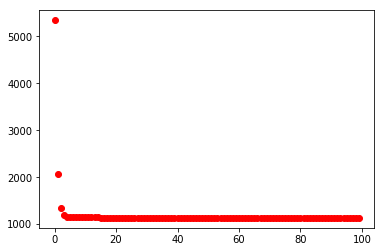

In [15]:
plt.plot(loss_values, 'ro')

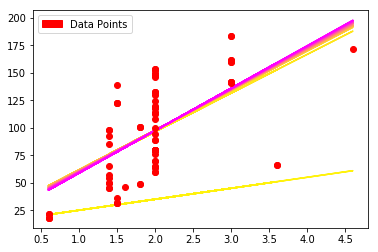

In [16]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()